In [1]:
%cd D:\IIT tutorials\2nd year\CS-521\assignment 3

D:\IIT tutorials\2nd year\CS-521\assignment 3


In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import pairwise_distances
from mpl_toolkits import mplot3d
import copy
%matplotlib inline

# Loading the Iris flower dataset
It's features are : Sepal length, Sepal width, Petal length, Petal width

In [3]:
iris = load_iris()

In [4]:
X = iris['data']
y = iris['target']
target_names = iris['target_names']
columns = ['Sepal length','Sepal width','Petal length','Petal width']
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [5]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [6]:
pca = PCA(n_components = 2)

In [7]:
embedded_X = pca.fit_transform(scaled_X)

In [8]:
df = pd.DataFrame(embedded_X)

#### We see if there is any correlation between the features of the flower and the eigenvectors

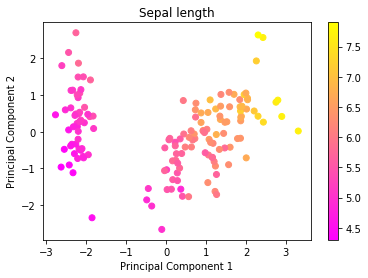

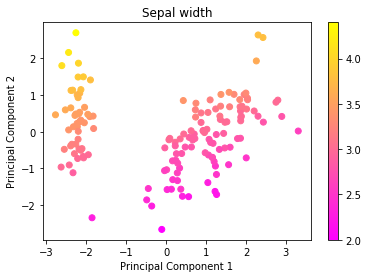

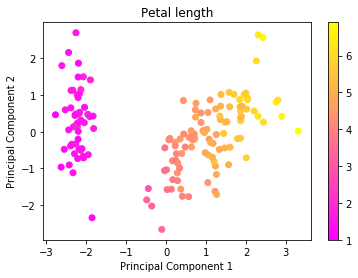

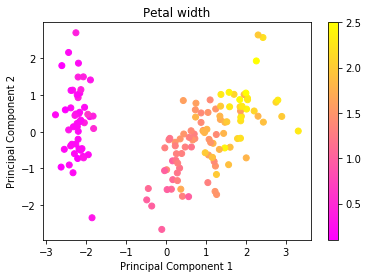

In [9]:
for i in range(len(X[0])):
    plt.scatter(df[0],df[1],c = X[:,i],cmap = 'spring') 
    plt.colorbar()
    plt.title(columns[i])
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.savefig("q2 images/eigenvector and "+columns[i]+" correlation.png")
    plt.show()

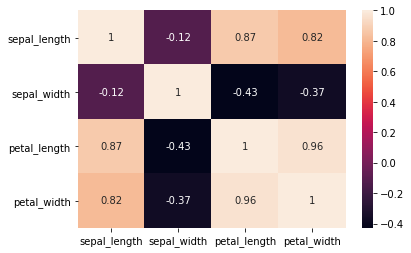

In [10]:
import seaborn as sns
temp = pd.DataFrame(sns.load_dataset('iris'))
sns_plot= sns.heatmap(temp.corr(),annot = True)
corr_plot = sns_plot.get_figure()

# TSNE with 2 components

#### The following metrics can be used as a parameter for TSNE.

In [11]:
sorted(sklearn.neighbors.VALID_METRICS['brute'])

['braycurtis',
 'canberra',
 'chebyshev',
 'cityblock',
 'correlation',
 'cosine',
 'cosine',
 'dice',
 'euclidean',
 'hamming',
 'haversine',
 'jaccard',
 'kulsinski',
 'l1',
 'l2',
 'mahalanobis',
 'manhattan',
 'matching',
 'minkowski',
 'nan_euclidean',
 'precomputed',
 'rogerstanimoto',
 'russellrao',
 'seuclidean',
 'sokalmichener',
 'sokalsneath',
 'sqeuclidean',
 'wminkowski',
 'yule']

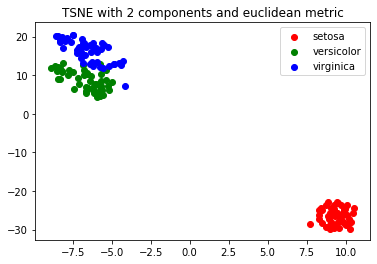

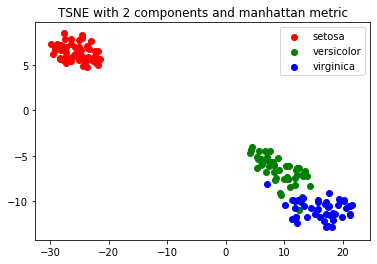

In [12]:
metrics = ["euclidean","manhattan"] # if needed, add chebyhev metric as third
for j in range(len(metrics)):
    embedded_X = TSNE(n_components = 2,metric = metrics[j]).fit_transform(X)
    fig,ax = plt.subplots()
    fnd = [0,0,0]
    for ind,color in zip([0,1,2],['r','g','b']):
        for i in range(len(embedded_X)):
            if(y[i] == ind):
                plt.scatter(embedded_X[i][0],embedded_X[i][1],color = color,label = target_names[ind] if fnd[ind] == 0 else "")
                fnd[ind] = 1
    plt.title("TSNE with 2 components and "+ str(metrics[j])+" metric")
    plt.legend()
    plt.savefig("q2 images/TSNE with 2 components and "+ str(metrics[j])+" metric")
    plt.show()

### TSNE with 3 components

#### Uncomment out %matplotlib notebook if you want an interactive 3d plot.

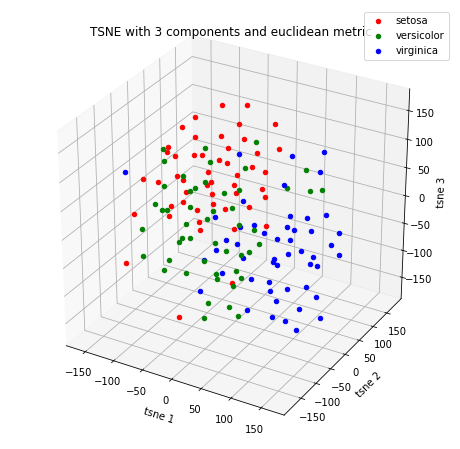

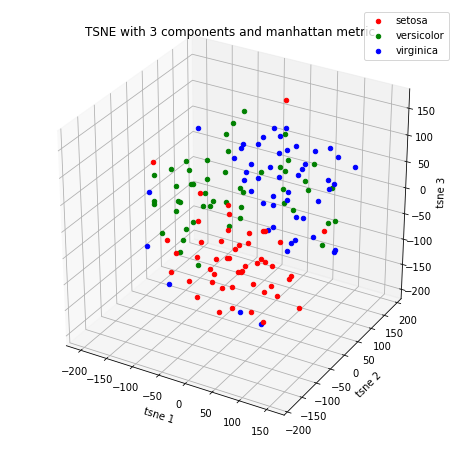

In [13]:
for i in range(len(metrics)):
#     %matplotlib notebook
    embedded_X = TSNE(n_components = 3).fit_transform(X)
    fig = plt.figure(figsize = (8,8))
    ax = fig.gca(projection = '3d')
    fnd = [0,0,0]
    for ind,color in zip([0,1,2],['r','g','b']):
        for i1 in range(len(embedded_X)):
            if(y[i1] == ind):
                ax.scatter(embedded_X[i1][0],embedded_X[i1][1],embedded_X[i1][2],color = color,label = target_names[ind] if fnd[ind] == 0 else "")
                fnd[ind] = 1
    plt.title("TSNE with 3 components and "+ str(metrics[i])+" metric")
    plt.legend()
    ax.set_xlabel("tsne 1")
    ax.set_ylabel("tsne 2")
    ax.set_zlabel("tsne 3")
#     fig.savefig("q2 images/TSNE with 3 components and "+ str(metrics[i])+" metric")
    plt.show()

# LDA while taking 2 classes at a time

In [14]:
def plot_line_2d(X,y,s):
    temp_y = [0 for i in range(len(X))]
    mu = [0,0,0]
    fnd = [0,0,0]
    marker = 's'
    for ind,color in zip(np.unique(y),['r','b']):
        for i in range(len(X)):
            if(y[i]==ind):
                plt.scatter(X[i],temp_y[i],color = color,marker = marker,label = target_names[ind] if fnd[ind]==0 else "")
                mu[ind]+=X[i]
                fnd[ind]=1
    plt.scatter((mu[0]+mu[1]+mu[2])/2,0,color = 'black',marker = 'x',label = "Decision boundary",s= 100)
    plt.legend()
    print(mu[0]+mu[1]+mu[2])
    plt.xlabel("LDA 1")
    plt.savefig("q2 images/1D LDA projection between classes "+str(s))
    plt.show()

Applying LDA for classes setosa and versicolor
[1.70530257e-13]


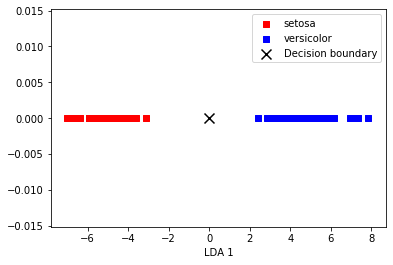

Applying LDA for classes setosa and virginica
[3.97903932e-13]


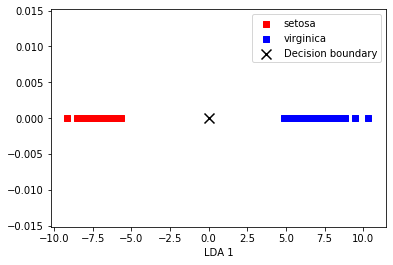

Applying LDA for classes versicolor and virginica
[1.84741111e-13]


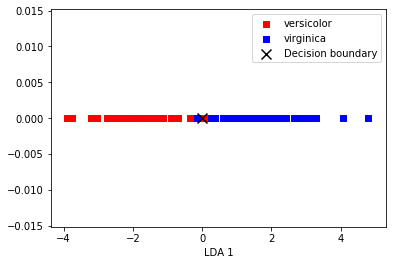

In [15]:
df = pd.DataFrame(scaled_X)
df['target'] = y
all_columns = copy.deepcopy(columns)
all_columns.append("target")
df.columns = all_columns
for i in range(3):
    for j in range(3):
        if(i<j):
            print("Applying LDA for classes {} and {}".format(target_names[i],target_names[j]))
            temp = pd.DataFrame(df.loc[df['target']!=3-i-j])
            temp.index = range(100)
#             print("Number of Different Classes: {}".format(temp['target'].nunique()))
            lda = LinearDiscriminantAnalysis()
            transformed_X = lda.fit(temp.drop(columns = ['target']),temp['target']).transform(temp.drop(columns = ['target']))
            plot_line_2d(transformed_X,temp['target'],i+j)

## LDA transformation with all 3 classes

In [16]:
lda = LinearDiscriminantAnalysis()
transformed_X = lda.fit(df,y).transform(df)

In [17]:
def plot_points_3d(X,y):
    fnd = [0,0,0]
    for ind,color in zip([0,1,2],['r','g','b']):
        for i in range(len(X)):
            if(y[i]==ind):
                plt.scatter(X[i][0],X[i][1],color = color,label = target_names[ind] if fnd[ind]==0 else "")
                fnd[ind] = 1
    plt.xlabel("LDA 1")
    plt.ylabel("LDA 2")
    plt.legend(shadow = False,scatterpoints = 1)
    plt.savefig("q2 images/2D plot for iris dataset")
    plt.show()

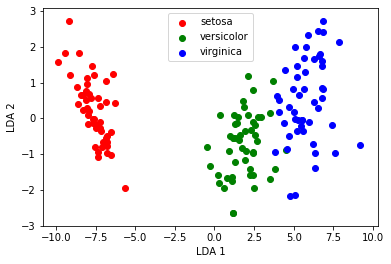

In [18]:
plot_points_3d(transformed_X,y)